### Make recommendation engine - content based:
based on similarity between 2 items 
Each item (movies) will have several features => we need to calculate the distance between vectors (representing items).

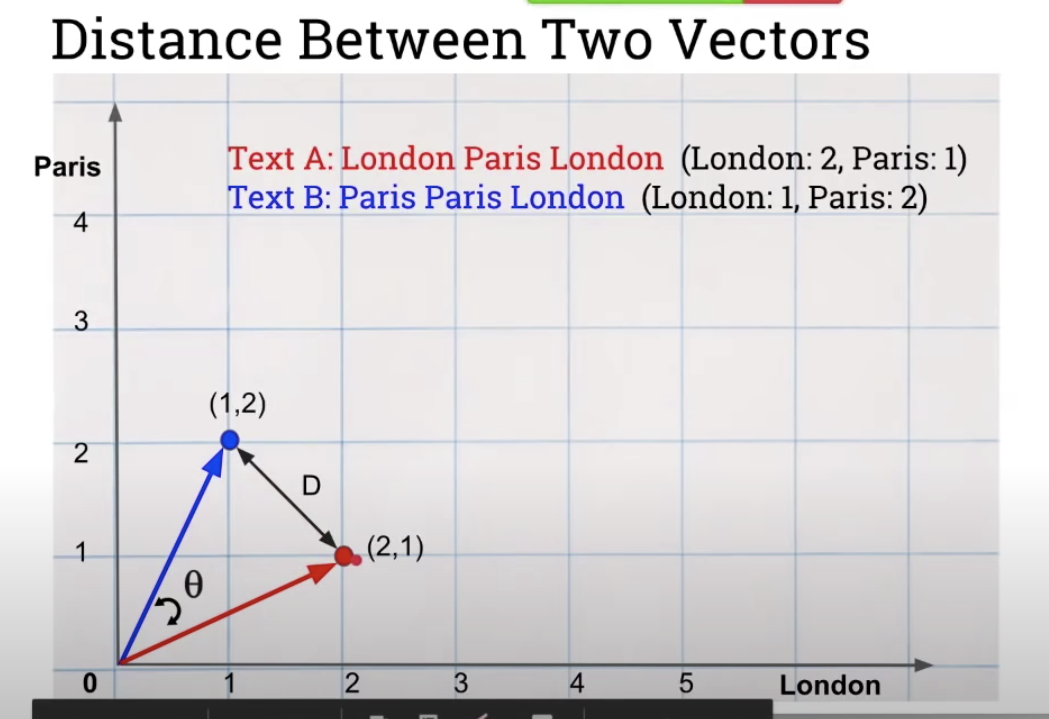

In order to do that, we need to calculate cosine similarity (cos(theta)). Let's take the below example to see how to calculate cosine similarity


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
text = ["London Paris London", "Paris Paris London"]
cv = CountVectorizer()
cv_fit = cv.fit_transform(text)

In [ ]:
print(cv.get_feature_names())
print(cv_fit.toarray())

['london', 'paris']
[[2 1]
 [1 2]]


In [ ]:
similarity_scores = cosine_similarity(cv_fit)

In [ ]:
print(similarity_scores)

[[1.  0.8]
 [0.8 1. ]]


**Intepretation:** the first sentence is similar to the first sentence by 100%, and by the second sentence by 80%; and vice versa. This is called a **similarity matrix**

### When to use eucledian and when to use cosine/angular similarity?
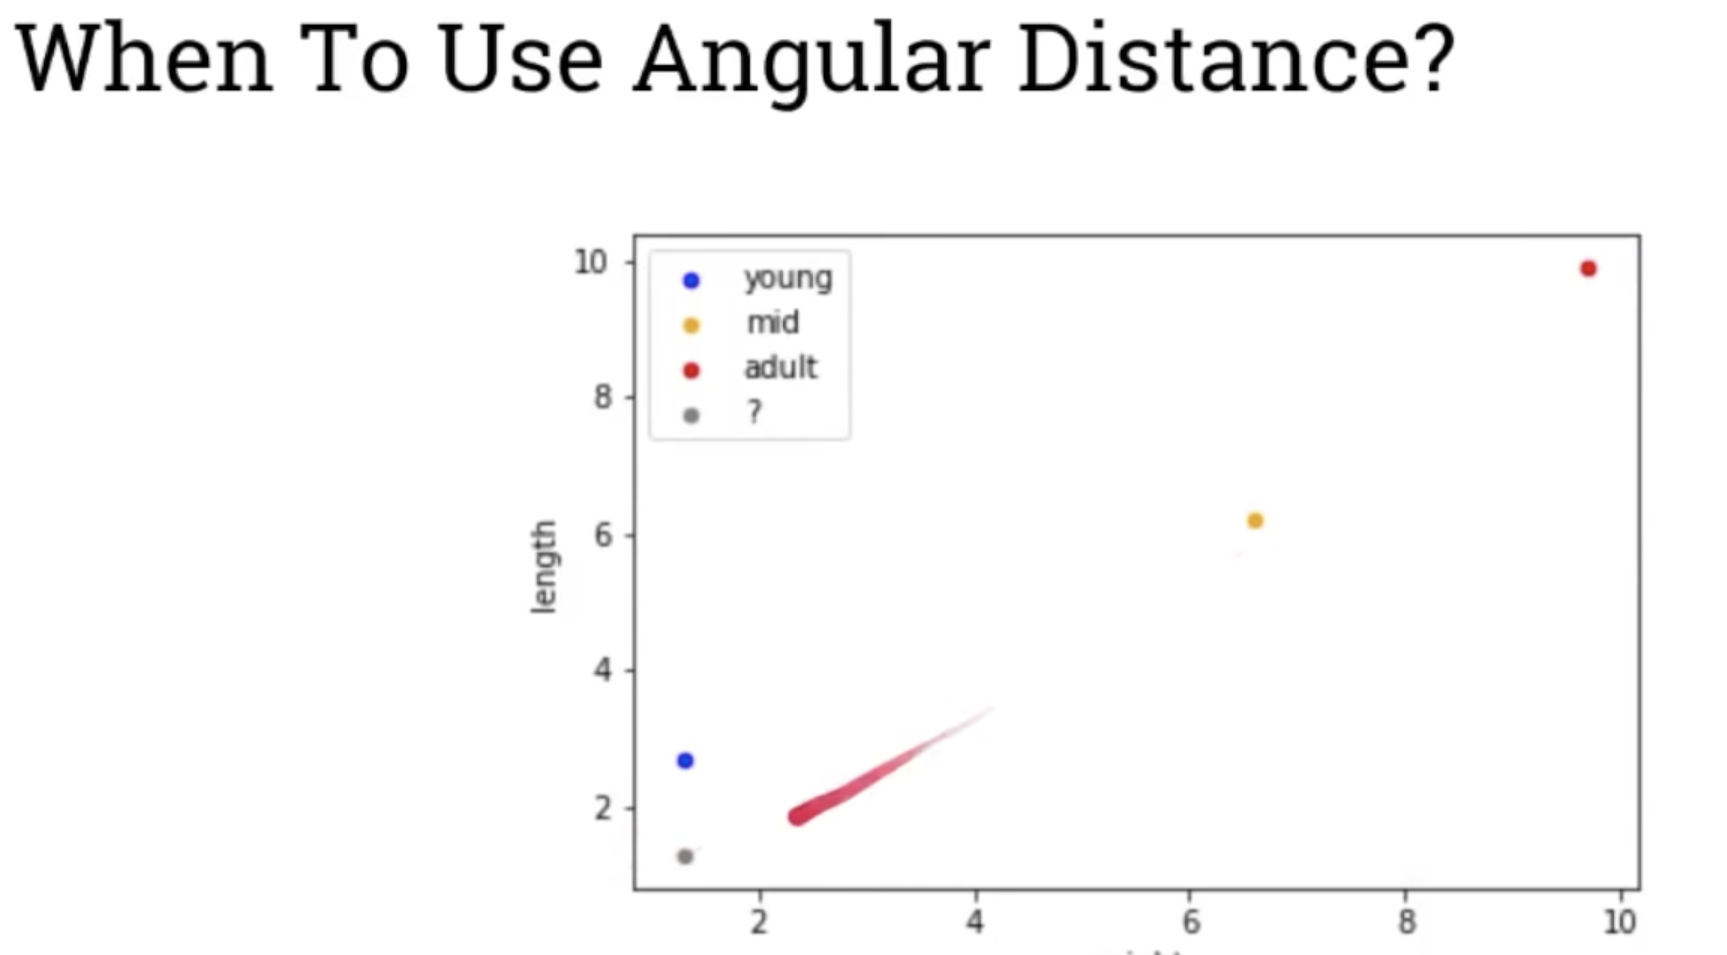
If we use angular distance, the grey point will be assigned to mid or adult, which is wrong. Hence, in this case we should use euclidian.
Depending on the context of the problem, we will use angular or euclidian distance accordingly.

An example would be: 
- User 1 bought 1 x eggs, 1x flour and 1x sugar
- User 2 bought 100x eggs, 100x flour, and 100x sugar
- User 3 bought 1x eggs, 1x Vodka, and 1x Red bull

Under cosine similarity, User 1 and 2 would be similar to each other, while with euclidian distance, User 1 and 3 are actually similar to each other.

So in cases in which magnitude (e.g., document sizes) is not the main factor that determines the difference here (1x - 100x doesn't matter to us) but more of the nature (content of the document) is what we are interested in, then cosine is the one. If then the quantity/magnitude matters in differentiating items (1x - 100x matters), then use euclidian.

### Action

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


###### helper functions. Use them when needed #######
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]


def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]


##################################################

##Step 1: Read CSV File
df = pd.read_csv("movie_dataset.csv")

##Step 2: Select Features - and handling missing values and so on
features = ['keywords', 'cast', 'genres', 'director']

##Step 3: Create a column in DF which combines all selected features
#### function to transform each row into 1 string
for feature in features:
    df[feature] = df[feature].fillna('')


def combine_features(row):
    return row['keywords'] + " " + row['cast'] + " " + row['genres'] + " " + row['director']


#### apply to all rows: using apply()
df['combined_features'] = df.apply(combine_features, axis=1)
print("Combined features:", df["combined_features"].head())

##Step 4: Create count matrix from this new combined column
cv = CountVectorizer()

count_matrix = cv.fit_transform(df['combined_features'])

##Step 5: Compute the Cosine Similarity based on the count_matrix
cosine_sim = cosine_similarity(count_matrix)

movie_user_likes = "Avatar"

## Step 6: Get index of this movie from its title
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index]))  # create [(0,1), (1,0.8), (2,0.3), (3, 0.5)]

## Step 7: Get a list of similar movies in descending order of similarity score
sorted_similar_movies = sorted(similar_movies, key=lambda x: x[1],
                               reverse=True)  # sort into [(0,1), (1,0.8), (3, 0.5), (2,0.3)]

## Step 8: Print titles of first 50 movies
i = 0
for movie in sorted_similar_movies:
    print(get_title_from_index(movie[0]))
    i += 1
    if i > 50:
        break



Combined features: 0    culture clash future space war space colony so...
1    ocean drug abuse exotic island east india trad...
2    spy based on novel secret agent sequel mi6 Dan...
3    dc comics crime fighter terrorist secret ident...
4    based on novel mars medallion space travel pri...
Name: combined_features, dtype: object
Avatar
Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1
Star Trek Into Darkness
Star Trek Beyond
Alien
Lockout
Jason X
The Helix... Loaded
Moonraker
Planet of the Apes
Galaxy Quest
Gravity
Alien³
Jupiter Ascending
The Wolverine
Silent Running
Zathura: A Space Adventure
Trekkies
Cargo
Wing Commander
Star Trek
Lost in Space
Babylon A.D.
The Fifth Element
Oblivion
Titan A.E.
AVP: Alien vs. Predator
The Empire Strikes Back
Dragonball Evolution
Superman Returns
Divergent
John Carter
The Black Hole
The Ice Pirates
Memoirs of an Invisible Man
Starship Troopers
The Astronaut's Wife
Machete Kills
Soldier
The Abyss
Damnation Alley
Men in Black
Space Cowbo